Utilities for color maps
===============


**Suhas Somnath**

8/12/2017  

**This is a short walk-through of useful plotting utilities available in sidpy**

Introduction
--------------
Some of the functions in ``sidpy.viz.plot_utils`` fill gaps in the default matplotlib package, some were
developed for scientific applications, These functions have been developed
to substantially simplify the generation of high quality figures for journal publications.

#### Import necessary packages:

In [4]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, \
    unicode_literals
import numpy as np
from warnings import warn
import matplotlib.pyplot as plt
import subprocess
import sys


def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])


# Package for downloading online files:
try:
    import sidpy
except ImportError:
    warn('sidpy not found.  Will install with pip.')
    import pip

    install('sidpy')
    import sidpy

# plot_utils has a handful of colormaps suited for different applications.

# cmap_jet_white_center()

This is the standard jet colormap with a white center instead of green. This is a good colormap for images with
divergent data (data that diverges slightly both positively and negatively from the mean).
One example target is the ronchigrams from scanning transmission electron microscopy (STEM)

## cmap_hot_desaturated()

This is a desaturated version of the  standard jet colormap

## discrete_cmap()

This function helps create a discretized version of the provided colormap. This is ideally suited when the data
only contains a few discrete values. One popular application is the visualization of labels from a clustering
algorithm

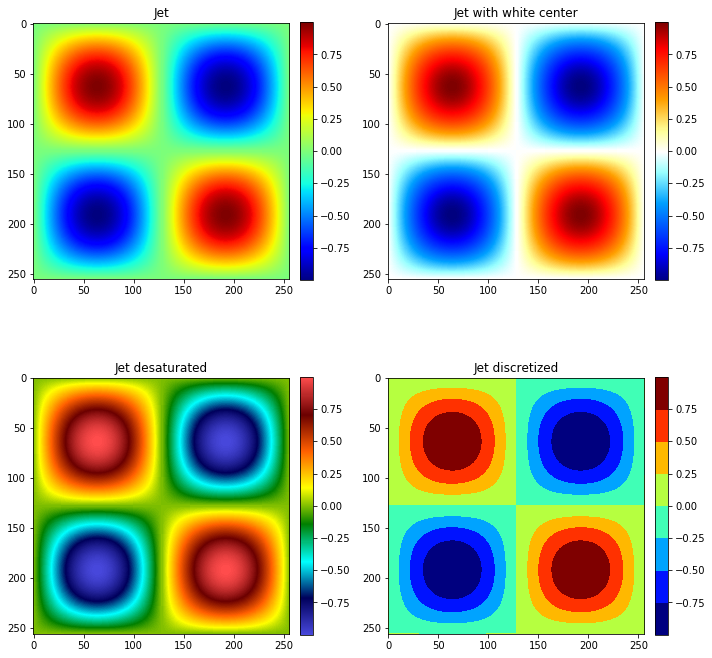

In [7]:
x_vec = np.linspace(0, 2*np.pi, 256)
y_vec = np.sin(x_vec)

test = y_vec * np.atleast_2d(y_vec).T

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for axis, title, cmap in zip(axes.flat,
                             ['Jet',
                              'Jet with white center',
                              'Jet desaturated',
                              'Jet discretized'],
                             [plt.cm.jet,
                              sidpy.viz.plot_utils.cmap_jet_white_center(),
                              sidpy.viz.plot_utils.cmap_hot_desaturated(),
                              sidpy.viz.plot_utils.discrete_cmap(8, cmap='jet')]):
    im_handle = axis.imshow(test, cmap=cmap)
    cbar = plt.colorbar(im_handle, ax=axis, orientation='vertical',
                        fraction=0.046, pad=0.04, use_gridspec=True)
    axis.set_title(title)
fig.tight_layout()

# make_linear_alpha_cmap()

On certain occasions we may want to superimpose one image with another. However, this is not possible
by default since colormaps involve solid colors. This function allows one to plot multiple images using
a transparent-to-solid colormap. Here we will demonstrate this by plotting blobs representing atomic columns
over some background intensity.

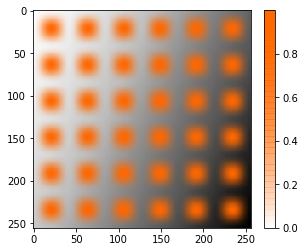

In [8]:
num_pts = 256

fig, axis = plt.subplots()

# Prepare some background signal
x_mat, y_mat = np.meshgrid(np.linspace(-0.2*np.pi, 0.1*np.pi, num_pts), np.linspace(0, 0.25*np.pi, num_pts))
background_distortion = 0.2 * (x_mat + y_mat + np.sin(0.25 * np.pi * x_mat))

# plot this signal in grey
axis.imshow(background_distortion, cmap='Greys')

# prepare the signal of interest (think of this as intensities in a HREM dataset)
x_vec = np.linspace(0, 6*np.pi, num_pts)
y_vec = np.sin(x_vec)**2
atom_intensities = y_vec * np.atleast_2d(y_vec).T

# prepare the transparent-to-solid colormap
solid_color = plt.cm.jet(0.8)
translucent_colormap = sidpy.viz.plot_utils.make_linear_alpha_cmap('my_map', solid_color,
                                                              1, min_alpha=0, max_alpha=1)

# plot the atom intensities using the custom colormap
im_handle = axis.imshow(atom_intensities, cmap=translucent_colormap)
cbar = plt.colorbar(im_handle, ax=axis, orientation='vertical',
                    fraction=0.046, pad=0.04, use_gridspec=True)


# get_cmap_object()

This function is useful more for developers writing their own plotting functions that need to manipulate the
colormap object. This function makes it easy to ensure that you are working on the colormap object and not the
string name of the colormap (both of which are accepted by most matplotlib functions).
Here we simply compare the returned values when passing both the colormap object and the string name of the colormap  


In [10]:
sidpy.viz.plot_utils.get_cmap_object('jet') == sidpy.viz.plot_utils.get_cmap_object(plt.cm.jet)

True

# cmap_from_rgba()
This function is handy for converting a Matlab-style colormap instructions (lists of [reg, green, blue, alpha]) to
matplotlib's style:

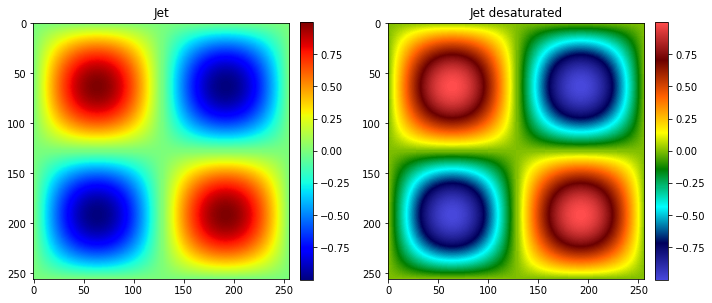

In [11]:
hot_desaturated = [(255.0, (255, 76, 76, 255)),
                   (218.5, (107, 0, 0, 255)),
                   (182.1, (255, 96, 0, 255)),
                   (145.6, (255, 255, 0, 255)),
                   (109.4, (0, 127, 0, 255)),
                   (72.675, (0, 255, 255, 255)),
                   (36.5, (0, 0, 91, 255)),
                   (0, (71, 71, 219, 255))]

new_cmap = sidpy.viz.plot_utils.cmap_from_rgba('hot_desaturated', hot_desaturated, 255)

x_vec = np.linspace(0, 2*np.pi, 256)
y_vec = np.sin(x_vec)

test = y_vec * np.atleast_2d(y_vec).T

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
for axis, title, cmap in zip(axes.flat,
                             ['Jet', 'Jet desaturated'],
                             [plt.cm.jet, new_cmap]):
    im_handle = axis.imshow(test, cmap=cmap)
    cbar = plt.colorbar(im_handle, ax=axis, orientation='vertical',
                        fraction=0.046, pad=0.04, use_gridspec=True)
    axis.set_title(title)
fig.tight_layout()